# Probability

The goals of the exercises below are to:
1. Familiarize yourself with common probability distributions, and learn to simulate data by drawing random samples from these distributions using the numpy.random library.
1. Learn to make graphs using matplotlib.
1. Investigate the evolution of a stochastic system using a random walk with symmetric and assymetric probabilities.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#  from __future__ import division  # Python 2 users uncomment this line

# Law of large numbers

In [38]:
heads = np.random.randint(2, size=10)
heads

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [39]:
len(heads)

10

In [43]:
heads[0:len(heads)]

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [44]:
sum(heads[0:len(heads)])

7

In [40]:
n_heads = [[n, sum(heads[0:n])/n] for n in range(1, len(heads))]
n_heads

[[1, 1.0],
 [2, 0.5],
 [3, 0.33333333333333331],
 [4, 0.5],
 [5, 0.59999999999999998],
 [6, 0.5],
 [7, 0.5714285714285714],
 [8, 0.625],
 [9, 0.66666666666666663]]

(0, 1)

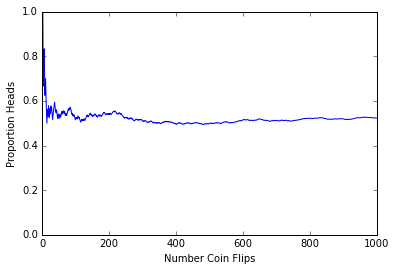

In [2]:
# Simulate the toss of a fair coin and plot the proportion of times it comes up "heads"
# Heads is represented by "1", tails by "0"
heads = np.random.randint(2, size=1000)
n_heads = [[n, sum(heads[0:n])/n] for n in range(1, len(heads))]
plt.plot(*zip(*n_heads))
plt.xlabel("Number Coin Flips")
plt.ylabel("Proportion Heads")
plt.ylim(0,1)

### Exercise
Graph the fraction of times a "3" is rolled on a fair die as a function of the number of rolls, similar to the above for the coin flip.

In [3]:
rolls = np.random.randint(1,6, size=10)
rolls

array([2, 4, 5, 3, 3, 4, 1, 1, 4, 1])

# Probability distributions

In [4]:
rolls == 3

array([False, False, False,  True,  True, False, False, False, False, False], dtype=bool)

### Probability distribution for roll of two dice

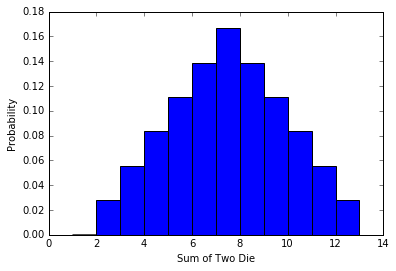

In [5]:
onedie = range(1,7)
twodie = [i+j for i in onedie for j in onedie]
plt.hist(twodie, bins=range(1,14), normed=True)
plt.xlabel("Sum of Two Die")
plt.ylabel("Probability")

### Exercise: Histogram of a sample 
1. Create a histogram of values drawn from the distributions presented using `numpy.random`. 
1. Add a line graph of the mathematical representation of the distribution.
1. Add vertical lines showing the theoretical mean, median, and mode. Add a horizontal line showing the population standard deviation. 
1. Calculate the sample mean and sample standard deviation, compare with the values for the population.
1. Vary the sample size. How large does the sample have to be to approximate the mathematical distribution?

The example below should get you started.

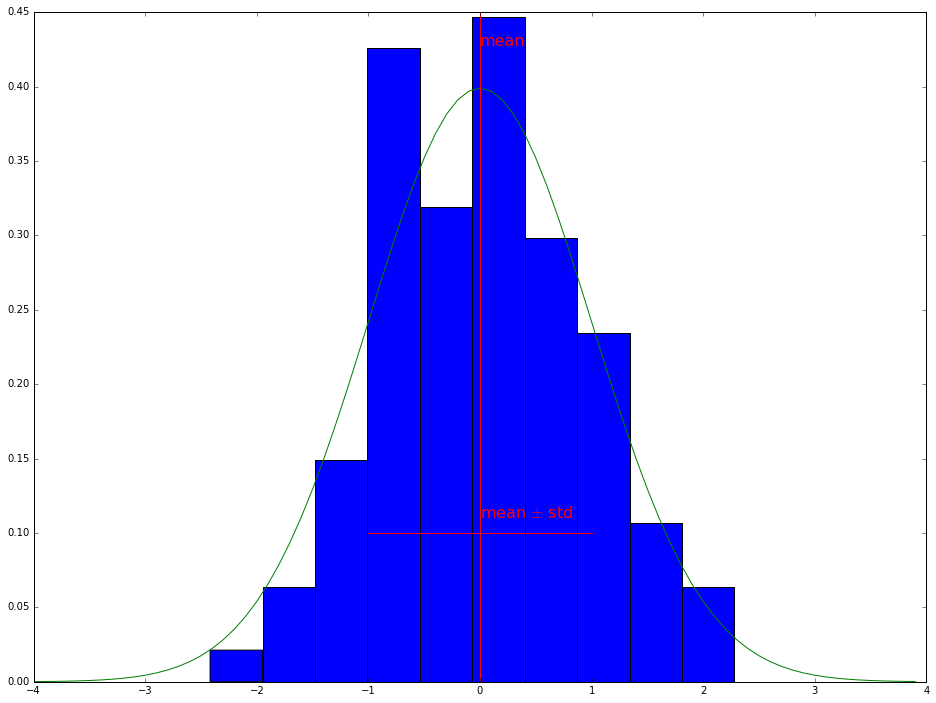

In [10]:
mean = 0
std = 1

def _gauss(x, mu=mean, sigma=std):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*pow((x-mu)/sigma,2))

gauss = np.vectorize(_gauss)
sample = [np.random.normal() for i in range(100)]
x = np.arange(-4,4,0.1)
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)

ax.hist(sample, normed=True)
ax.plot(x, gauss(x))
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.axvline(x=0, color="red")
ax.annotate("mean", xy=(mean, ylim[-1]*0.95), color = "red", fontsize=16)
ax.autoscale(False)
ax.plot((mean-std, mean+std), (0.1, 0.1), color="red")
ax.annotate(r"mean $\pm$ std", xy=(mean, 0.11), color = "red", fontsize=16)


# 2-D Random Walk
Random walks are used to simulate a great number of processes, such as diffusion and animal foraging behavior. Here we will build a simulation of the classic "Drunkard's Walk". The drunkard walks on a two-dimensional lattice, choosing north, south, east, or west with equal probability. 

I will use this opportunity to show how to write a class in python.

In [6]:
class Walker(object):
    """ The base class for a random walker."""
    def __init__(self, x0=0, y0=0, weights=[1,1,1,1]):
        """ The walker starts at position (x0, y0). At each step he moves]
             in a direction [N,E,S,W] with probability proportional to the 
             weights given.
        """
        self.pos = np.array([x0,y0])
        self.prob = np.array(weights)/sum(weights)
        # define the directions [N,E,S,W]
        self.directions = np.array([[0,1], [1,0], [0,-1], [-1,0]])
            
    def move(self):
        """ Execute one step and return the new position."""
        direction = np.random.choice(len(self.prob), p=self.prob)
        self.pos += self.directions[direction]
        return self.pos
            

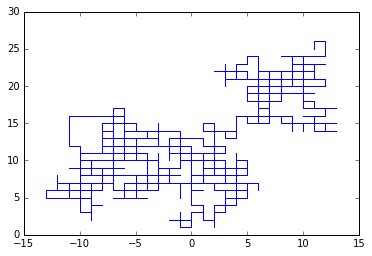

In [7]:
# Compare the path of the walker shown below with your neighbor.
mywalker = Walker()
nsteps = 1000
walk = [tuple(mywalker.move()) for i in range(nsteps)]
plt.plot(*zip(*walk))

In [23]:
class Walker2(object):
    """ The base class for a random walker."""
#    def __init__(self, x0=0, y0=0, weights=[1,1,1,1]):
    def __init__(self, x0=0, y0=0, weights=[0.25,0.35,0.25,0.15]):
        """ The walker starts at position (x0, y0). At each step he moves]
             in a direction [N,E,S,W] with probability proportional to the 
             weights given.
        """
        self.pos = np.array([x0,y0])
        self.prob = np.array(weights)/sum(weights)
        # define the directions [N,E,S,W]
        self.directions = np.array([[0,1], [1,0], [0,-1], [-1,0]])
            
    def move(self):
        """ Execute one step and return the new position."""
        direction = np.random.choice(len(self.prob), p=self.prob)
        self.pos += self.directions[direction]
        return self.pos

[(18, -6), (19, -6), (18, -6), (18, -5)]

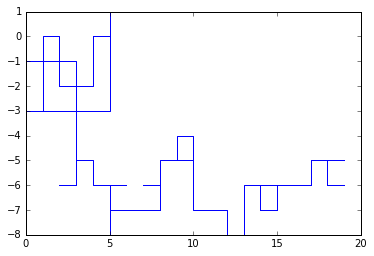

In [32]:
mywalker100 = Walker2()
nsteps = 100
walk = [tuple(mywalker100.move()) for i in range(nsteps)]

plt.plot(*zip(*walk))
walk[95:99] # position of the walker will be after 100 steps


### Exercise
What do you think the expected value of the position of the walker will be after 100 steps?

What if you change the probabilities of each direction so they are not all equal? Say there is a strong wind coming from the west, so the walker will choose west 15% of the time, E 35% of the time, N or S each 25%. How will that affect the expected value of the position after 100 steps?

Run simulations of the above scenerios and calculate the average position after 100 steps (which tends to the expected value of the position as the number of simulations goes to infinity).